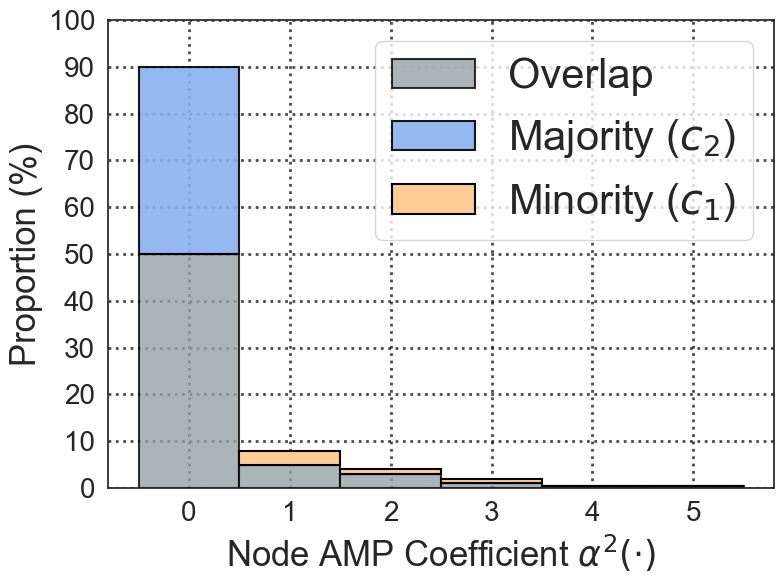

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 设置字体大小
text_size = 25

def hex_to_rgb(hex_color):
    """将十六进制颜色转换为 RGB"""
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb_color):
    """将 RGB 颜色转换为十六进制"""
    return '#{:02X}{:02X}{:02X}'.format(*rgb_color)

def mix_colors(color1, color2, alpha=0.5):
    """混合两种颜色"""
    rgb1 = hex_to_rgb(color1)
    rgb2 = hex_to_rgb(color2)
    mixed_rgb = tuple(int(alpha * c1 + (1 - alpha) * c2) for c1, c2 in zip(rgb1, rgb2))
    return rgb_to_hex(mixed_rgb)

# 示例颜色
color1 = "6D9EEB"  # 蓝色
color2 = "F6B26B"  # 橙色
mixed_color = "#97a1a5" # 混合色

# 数据准备
bins = np.arange(6)  # 直方图的区间
majority = [90, 5, 3, 1, 0.5, 0.5]  # 多数类数据
minority = [50, 8, 4, 2, 0.5, 0.5]  # 少数类数据
overlap = [min(maj, mino) for maj, mino in zip(majority, minority)]  # 计算重叠部分

# 绘制图表
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 1  # 调整柱宽，确保柱子之间没有间隙

# 绘制重叠部分（灰色，在底部）
ax.bar(bins, overlap, width=bar_width, color=mixed_color, edgecolor='black', linewidth=1.5, label='Overlap', alpha=0.8)

# 绘制蓝色部分（多数类非重叠部分，在重叠区域之上）
blue_part = [maj - ov for maj, ov in zip(majority, overlap)]
ax.bar(bins, blue_part, width=bar_width, color='#8ab1ef', edgecolor='black', linewidth=1.5, bottom=overlap, label='Majority ($c_2$)', alpha=0.9)

# 绘制橙色部分（少数类非重叠部分，在重叠区域之上）
orange_part = [mino - ov for mino, ov in zip(minority, overlap)]
ax.bar(bins, orange_part, width=bar_width, color='#ffcc95', edgecolor='black', linewidth=1.5, bottom=overlap, label='Minority ($c_1$)', alpha=1)

# 设置坐标轴标签和刻度
ax.set_xlabel('Node AMP Coefficient $\\alpha^2(\\cdot)$', fontsize=text_size)
ax.set_ylabel('Proportion (%)', fontsize=text_size)
ax.set_xticks(bins)
ax.tick_params(axis='both', which='major', labelsize=text_size - 5)

# 修改纵轴刻度密集度为10%
ax.set_yticks(np.arange(0, 101, 10))

# 显示网格（点状样式）
ax.grid(True, linestyle='dotted', linewidth=2.0, alpha=0.7, color='black')

# 添加图例并调整大小
ax.legend(loc='upper right', fontsize=30, frameon=True)

# 调整图表布局
plt.tight_layout()

# 显示图表
plt.show()


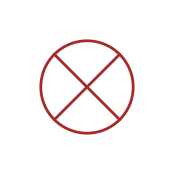

In [126]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
import numpy as np

# 创建绘图
fig, ax = plt.subplots(figsize=(2, 2))

# 圆心位置与半径
circle_center = (0.5, 0.5)
radius = 0.3

# 添加圆
circle = Circle(circle_center, radius=radius, edgecolor='brown', facecolor='none', linewidth=2)
ax.add_patch(circle)

# 计算斜线的起点和终点，使它们的长度恰好为圆的直径
# 计算斜线的方向向量
angle = np.pi / 4  # 45度角，用于斜线

# 计算斜线的两个端点
x1 = circle_center[0] + radius * np.cos(angle)
y1 = circle_center[1] + radius * np.sin(angle)

x2 = circle_center[0] - radius * np.cos(angle)
y2 = circle_center[1] - radius * np.sin(angle)

# 添加斜线1，从一个圆的边缘到另一个
x_line1 = Line2D([x1, x2], [y1, y2], color='brown', linewidth=2)

# 计算斜线2，从另一个角度交叉
x3 = circle_center[0] + radius * np.cos(-angle)
y3 = circle_center[1] + radius * np.sin(-angle)

x4 = circle_center[0] - radius * np.cos(-angle)
y4 = circle_center[1] - radius * np.sin(-angle)

x_line2 = Line2D([x3, x4], [y3, y4], color='brown', linewidth=2)

# 添加斜线到图中
ax.add_line(x_line1)
ax.add_line(x_line2)

# 设置轴的范围和比例
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')  # 关闭轴线

# 显示图像
plt.show()


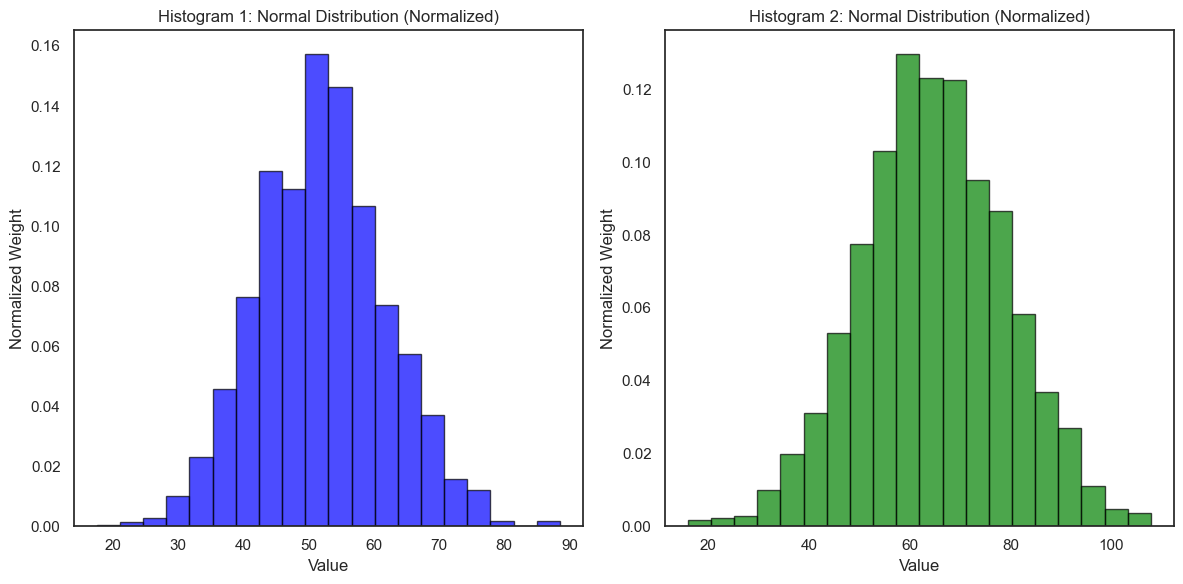

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# 设置随机种子保证结果可复现
np.random.seed(42)

# 生成两个正态分布的权重数据
data1 = np.random.normal(loc=50, scale=10, size=1000)  # 第一组数据：平均值50，标准差10
data2 = np.random.normal(loc=60, scale=15, size=1000)  # 第二组数据：平均值60，标准差15

# 将数据标准化，使权重之和为1
weights1 = data1 / np.sum(data1)
weights2 = data2 / np.sum(data2)

# 创建直方图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制第一个直方图
axes[0].hist(data1, bins=20, weights=weights1, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Histogram 1: Normal Distribution (Normalized)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Normalized Weight')

# 绘制第二个直方图
axes[1].hist(data2, bins=20, weights=weights2, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram 2: Normal Distribution (Normalized)')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Normalized Weight')

# 调整布局并显示
plt.tight_layout()
plt.show()


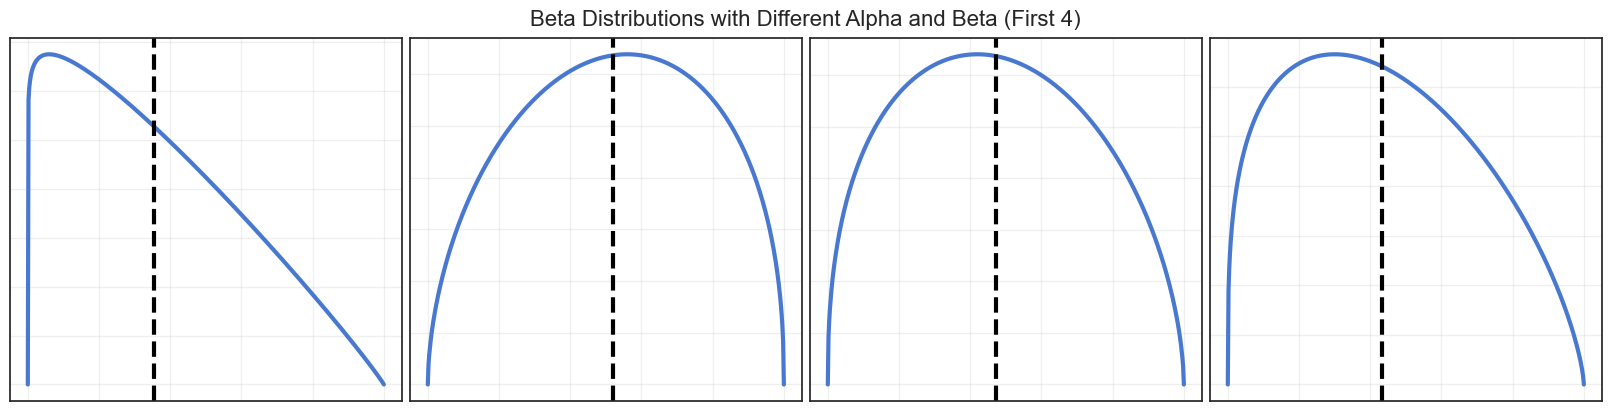

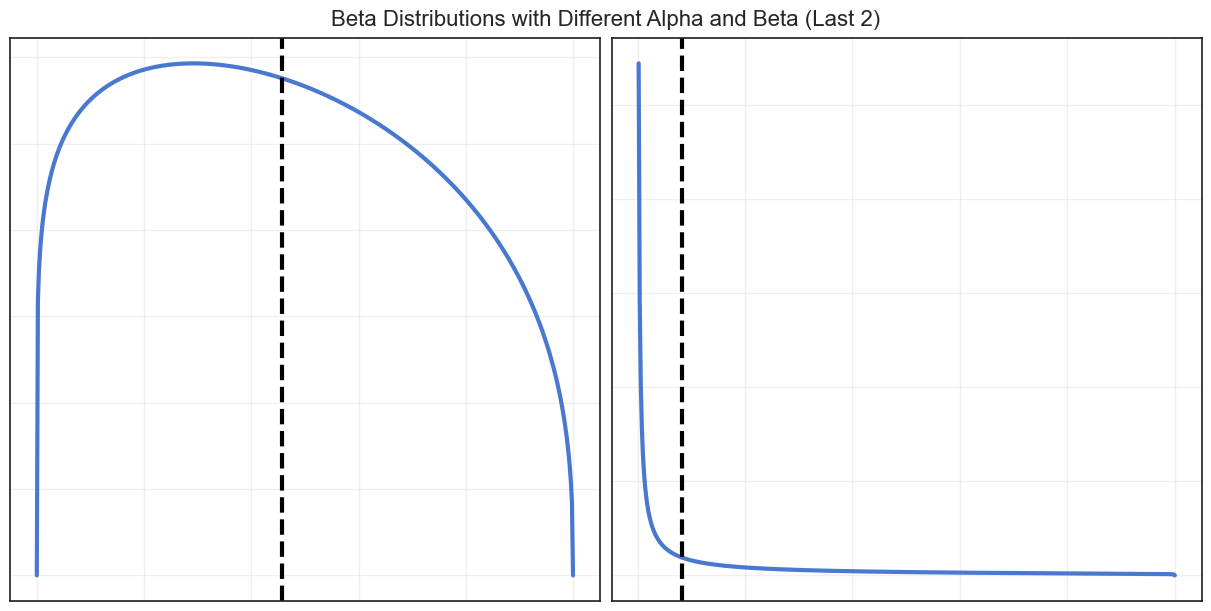

In [128]:
# Re-import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define alpha and beta values
alpha_beta_values = [
    (1.06, 1.94),
    (1.56, 1.44),
    (1.42, 1.58),
    (1.3, 1.7),
    (1.15, 1.364),
    (0.1, 1.1)
]

# Plot beta distributions
x = np.linspace(0, 1, 500)

# Create the first plot (for the first 4 graphs)
fig1, axes1 = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)  # 1x4 layout
axes1 = axes1.flatten()

# Plot the first 4 graphs in the first plot
for i, (alpha, beta_value) in enumerate(alpha_beta_values[:4]):  # Only the first 4 values
    y = beta.pdf(x, alpha, beta_value)
    mean = alpha / (alpha + beta_value)
    axes1[i].plot(x, y, linewidth=3)  # Increase the Beta distribution curve line width
    axes1[i].axvline(mean, color='black', linestyle='--', linewidth=3)  # Increase the vertical line width
    axes1[i].grid(alpha=0.3)
    axes1[i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks and labels

fig1.suptitle("Beta Distributions with Different Alpha and Beta (First 4)", fontsize=16)

# Create the second plot (for the last 2 graphs)
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)  # 1x2 layout
axes2 = axes2.flatten()

# Plot the last 2 graphs in the second plot
for i, (alpha, beta_value) in enumerate(alpha_beta_values[4:]):  # Only the last 2 values
    y = beta.pdf(x, alpha, beta_value)
    mean = alpha / (alpha + beta_value)
    axes2[i].plot(x, y, linewidth=3)  # Increase the Beta distribution curve line width
    axes2[i].axvline(mean, color='black', linestyle='--', linewidth=3)  # Increase the vertical line width
    axes2[i].grid(alpha=0.3)
    axes2[i].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Hide ticks and labels

fig2.suptitle("Beta Distributions with Different Alpha and Beta (Last 2)", fontsize=16)

plt.show()


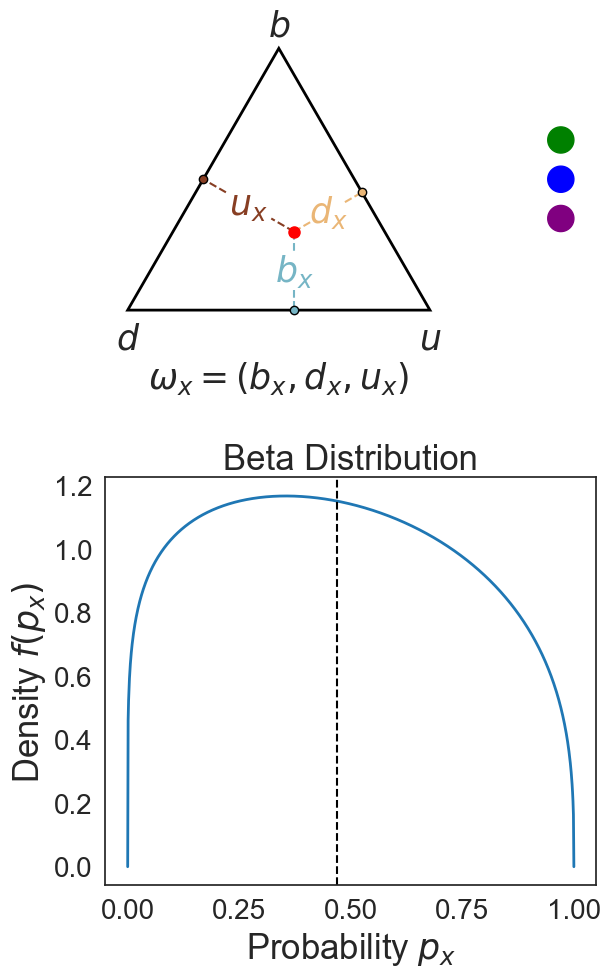

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.patches import RegularPolygon

text_size = 25  # Global font size

# Function to generate vertices of an equilateral triangle
def generate_triangle_vertices():
    L = 2 / np.sqrt(3)  # Side length
    return np.array([[0, 0], [L, 0], [L / 2, 1]])  # Vertices (B, A, C)

# Function to project a point to a line segment (find perpendicular foot)
def project_to_line(p, a, b):
    ap = p - a
    ab = b - a
    t = np.dot(ap, ab) / np.dot(ab, ab)
    t = np.clip(t, 0, 1)  # Ensure projection is within the segment
    return a + t * ab

# Function to generate barycentric grid and convert to Cartesian coordinates
def generate_barycentric_grid(resolution=400):
    b_values = np.linspace(0, 1, resolution)
    d_values = np.linspace(0, 1, resolution)
    grid_b, grid_d = np.meshgrid(b_values, d_values)
    u_values = 1 - grid_b - grid_d  # u = 1 - b - d

    # Mask valid barycentric coordinates where all b, d, and u > 0
    mask = (u_values > 0) & (grid_b > 0) & (grid_d > 0)
    grid_b, grid_d, grid_u = grid_b[mask], grid_d[mask], u_values[mask]

    # Convert to Cartesian coordinates
    L = 2 / np.sqrt(3)
    x = grid_b * L + grid_d * 0 + grid_u * (L / 2)
    y = grid_d * 0 + grid_u * 1
    return x, y, np.vstack([grid_b, grid_d, grid_u]).T  # Cartesian and barycentric

# Function to plot Barycentric triangle with perpendicular lines (First Subplot)
def plot_barycentric_triangle(ax):
    vertices = generate_triangle_vertices()
    L = 2 / np.sqrt(3)

    # Draw triangle
    ax.fill(*zip(*vertices), edgecolor='black', facecolor='white', linewidth=2)

    # Annotate vertices
    ax.text(0, -0.05, r'$d$', fontsize=text_size, ha='center', va='top')
    ax.text(L, -0.05, r'$u$', fontsize=text_size, ha='center', va='top')
    ax.text(L / 2, 1.05, r'$b$', fontsize=text_size, ha='center')

    # Define barycentric coordinates
    disbelief = 0.3
    belief = 0.4
    uncertainty = 1 - disbelief - belief

    # Convert to Cartesian coordinates
    bx = disbelief * 0 + belief * L + uncertainty * (L / 2)
    by = disbelief * 0 + belief * 0 + uncertainty * 1
    barycenter = np.array([bx, by])

    # Plot barycentric point
    ax.plot(bx, by, 'o', color='red', markersize=8, label=r'$C_x$', zorder=5)

    # Draw perpendicular lines in two segments to leave space for text labels
    edge_pairs = [
        (vertices[0], vertices[1], (118/ 255,181/ 255,197/ 255), r'$b_x$'),
        (vertices[1], vertices[2], (234/ 255,182/ 255,118/ 255), r'$d_x$'),
        (vertices[2], vertices[0], (135/ 255,62/ 255,35/ 255), r'$u_x$')
    ]
    for a, b, color, label in edge_pairs:
        foot = project_to_line(barycenter, a, b)
        line_x = [barycenter[0], foot[0]]
        line_y = [barycenter[1], foot[1]]

        # Divide the line into two segments
        mid_x = (barycenter[0] + foot[0]) / 2
        mid_y = (barycenter[1] + foot[1]) / 2

        # Draw first segment
        ax.plot([line_x[0], (line_x[0] + mid_x) / 2], [line_y[0], (line_y[0] + mid_y) / 2],
                '--', color=color, linewidth=1.5)
        # Draw second segment
        ax.plot([(line_x[1] + mid_x) / 2, line_x[1]], [(line_y[1] + mid_y) / 2, line_y[1]],
                '--', color=color, linewidth=1.5)

        # Plot foot of the perpendicular
        ax.plot(foot[0], foot[1], 'o', color=color, markersize=6, markeredgecolor='black')

        # Add label at the center of the line
        ax.text(mid_x, mid_y, label, fontsize=text_size, color=color, ha='center', va='center')

    # # Add custom arrow and pattern
    # ax.annotate('', xy=(1.1, 0.5), xytext=(L / 2, 0.5),  # Arrow start and end points
    #             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8))

    # Draw circles using RegularPolygon
    circle_x = 2 / np.sqrt(3) + 0.5  # Align with colorbar x-coordinate
    radius = 0.05
    circle_centers = [0.5, 0.65, 0.35]
    circle_colors = ['blue', 'green', 'purple']
    for center, color in zip(circle_centers, circle_colors):
        patch = RegularPolygon((circle_x, center), numVertices=50, radius=radius, color=color, zorder=10)
        ax.add_patch(patch)

    # Add label below the triangle
    ax.text(L / 2, -0.3, r'$\omega_x=(b_x, d_x, u_x)$', fontsize=text_size, ha='center')

    # Axis settings
    ax.set_aspect('equal')
    ax.axis('off')

# Function to plot Beta distribution and the Barycentric triangle
def plot_combined_plots():
    # Create figure with subplots in a vertical layout (2 rows, 1 column)
    fig, axes = plt.subplots(2, 1, figsize=(6, 10), gridspec_kw={'hspace': 0.1}, constrained_layout=True)

    # First subplot: Barycentric triangle
    plot_barycentric_triangle(axes[0])

    # Second subplot: Beta Distribution Plot
    x = np.linspace(0, 1, 1000)
    alpha, beta_param = (1.183, 1.333)  # Parameters for Beta distribution
    y = beta.pdf(x, alpha, beta_param)

    axes[1].plot(x, y, color='#1f77b4', linewidth=2)

    # Add vertical dashed line at the most likely point for this Beta distribution
    mode = (alpha) / (alpha + beta_param)
    if mode is not None:
        axes[1].axvline(x=mode, color='black', linestyle='--', label=f'Mode = {mode:.2f}')

    axes[1].set_xlabel('Probability $p_x$', fontsize=text_size)
    axes[1].set_ylabel('Density $f(p_x)$', fontsize=text_size)
    axes[1].set_title('Beta Distribution', fontsize=text_size)
    
    # Adjust tick labels
    axes[1].tick_params(axis='x', labelsize=20)  # Increase font size for x-axis ticks
    axes[1].tick_params(axis='y', labelsize=20)  # Increase font size for y-axis ticks

    # Display a legend
    # axes[1].legend(fontsize=text_size)

    plt.show()

# Execute the combined function
plot_combined_plots()


[0.57940872 0.57470824 0.57510032 0.59033799 0.58718372 0.620735
 0.73475287 0.57082929 0.57997453 0.73475287 0.68002394 0.73475287
 0.6011894  0.73475287 0.63444021 0.48055094 0.43899279 0.72207171
 0.72207171 0.50757601]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Counter({0.0: 100, 1.0: 10})


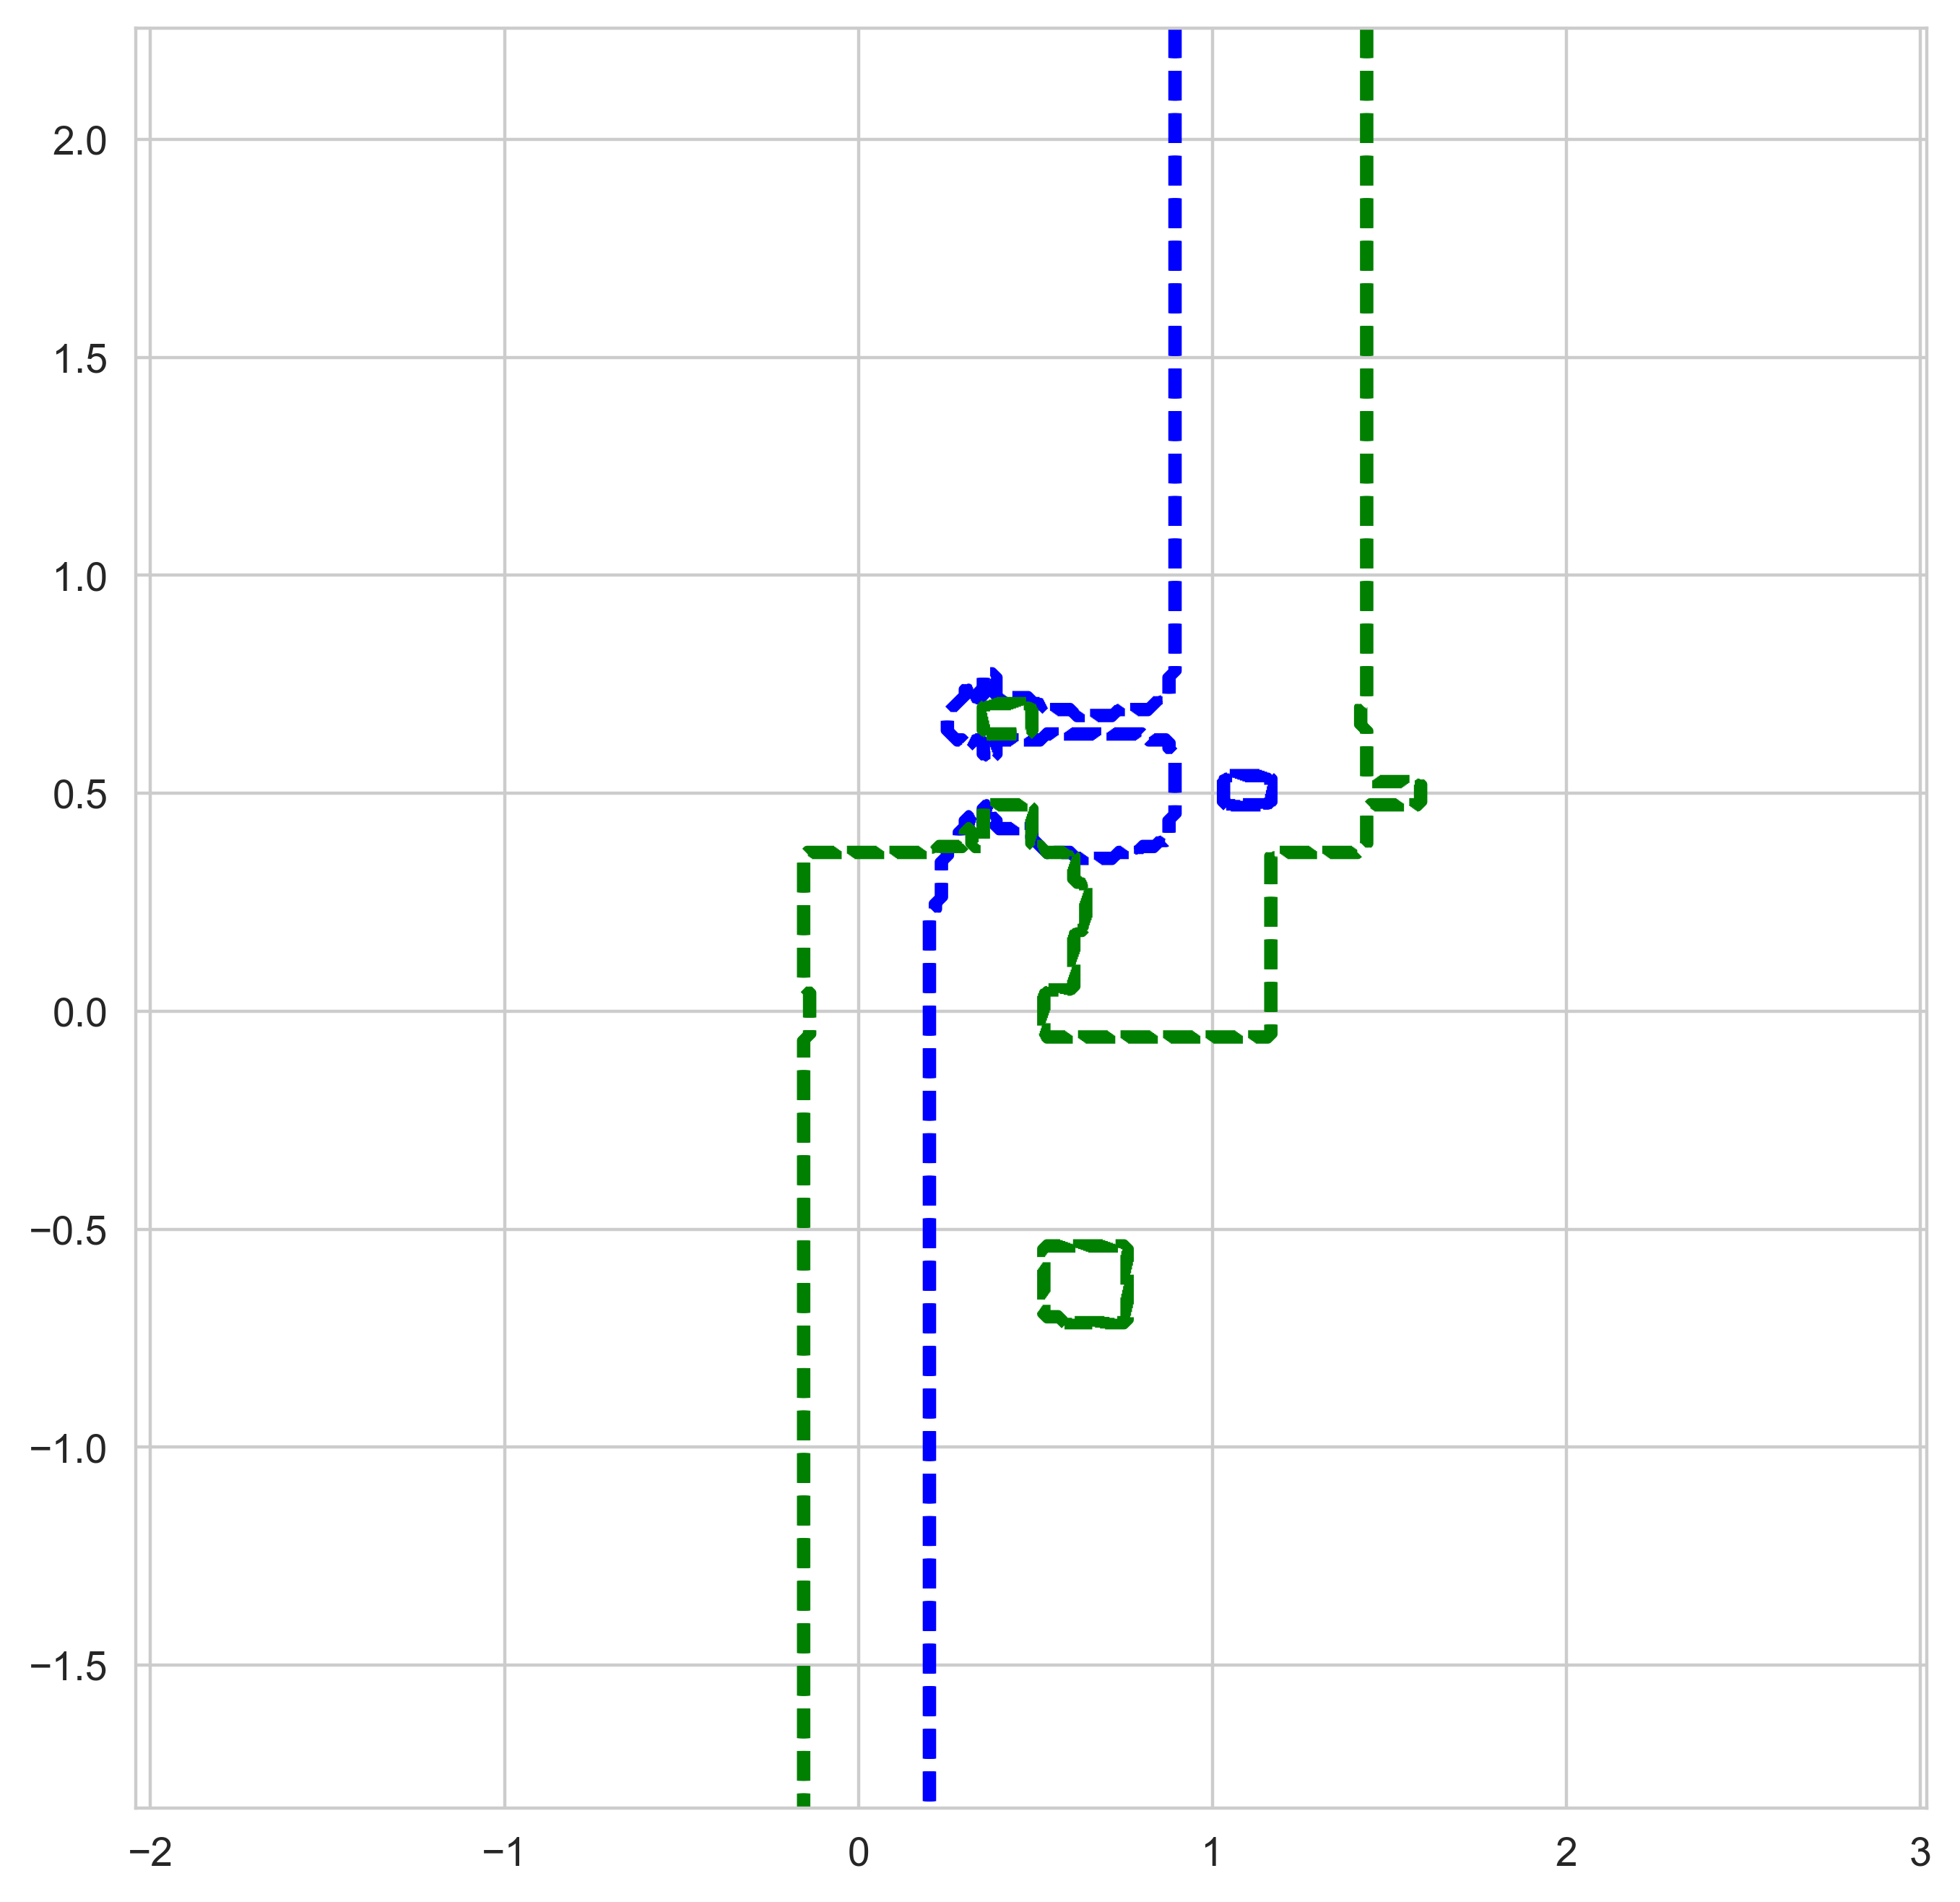

Begin to train.... - 2025-01-22 00:32:47,173 - UncertaintyAwareDeepForest
the shape of training samples: (110, 2) - 2025-01-22 00:32:47,181 - UncertaintyAwareDeepForest
use gmean as training evaluation - 2025-01-22 00:32:47,182 - UncertaintyAwareDeepForest
stacking: False, save model: False - 2025-01-22 00:32:47,182 - UncertaintyAwareDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2025-01-22 00:32:47,183 - UncertaintyAwareDeepForest
The evaluation[gmean] of layer_0 is 0.5422 - 2025-01-22 00:32:56,599 - UncertaintyAwareDeepForest
-----------------------------------------layer-1-------------------------------------------- - 2025-01-22 00:32:56,599 - UncertaintyAwareDeepForest


num_layers: 1


The evaluation[gmean] of layer_1 is 0.8672 - 2025-01-22 00:33:05,703 - UncertaintyAwareDeepForest
training finish... - 2025-01-22 00:33:05,703 - UncertaintyAwareDeepForest


num_layers: 2
last_layer_index 1


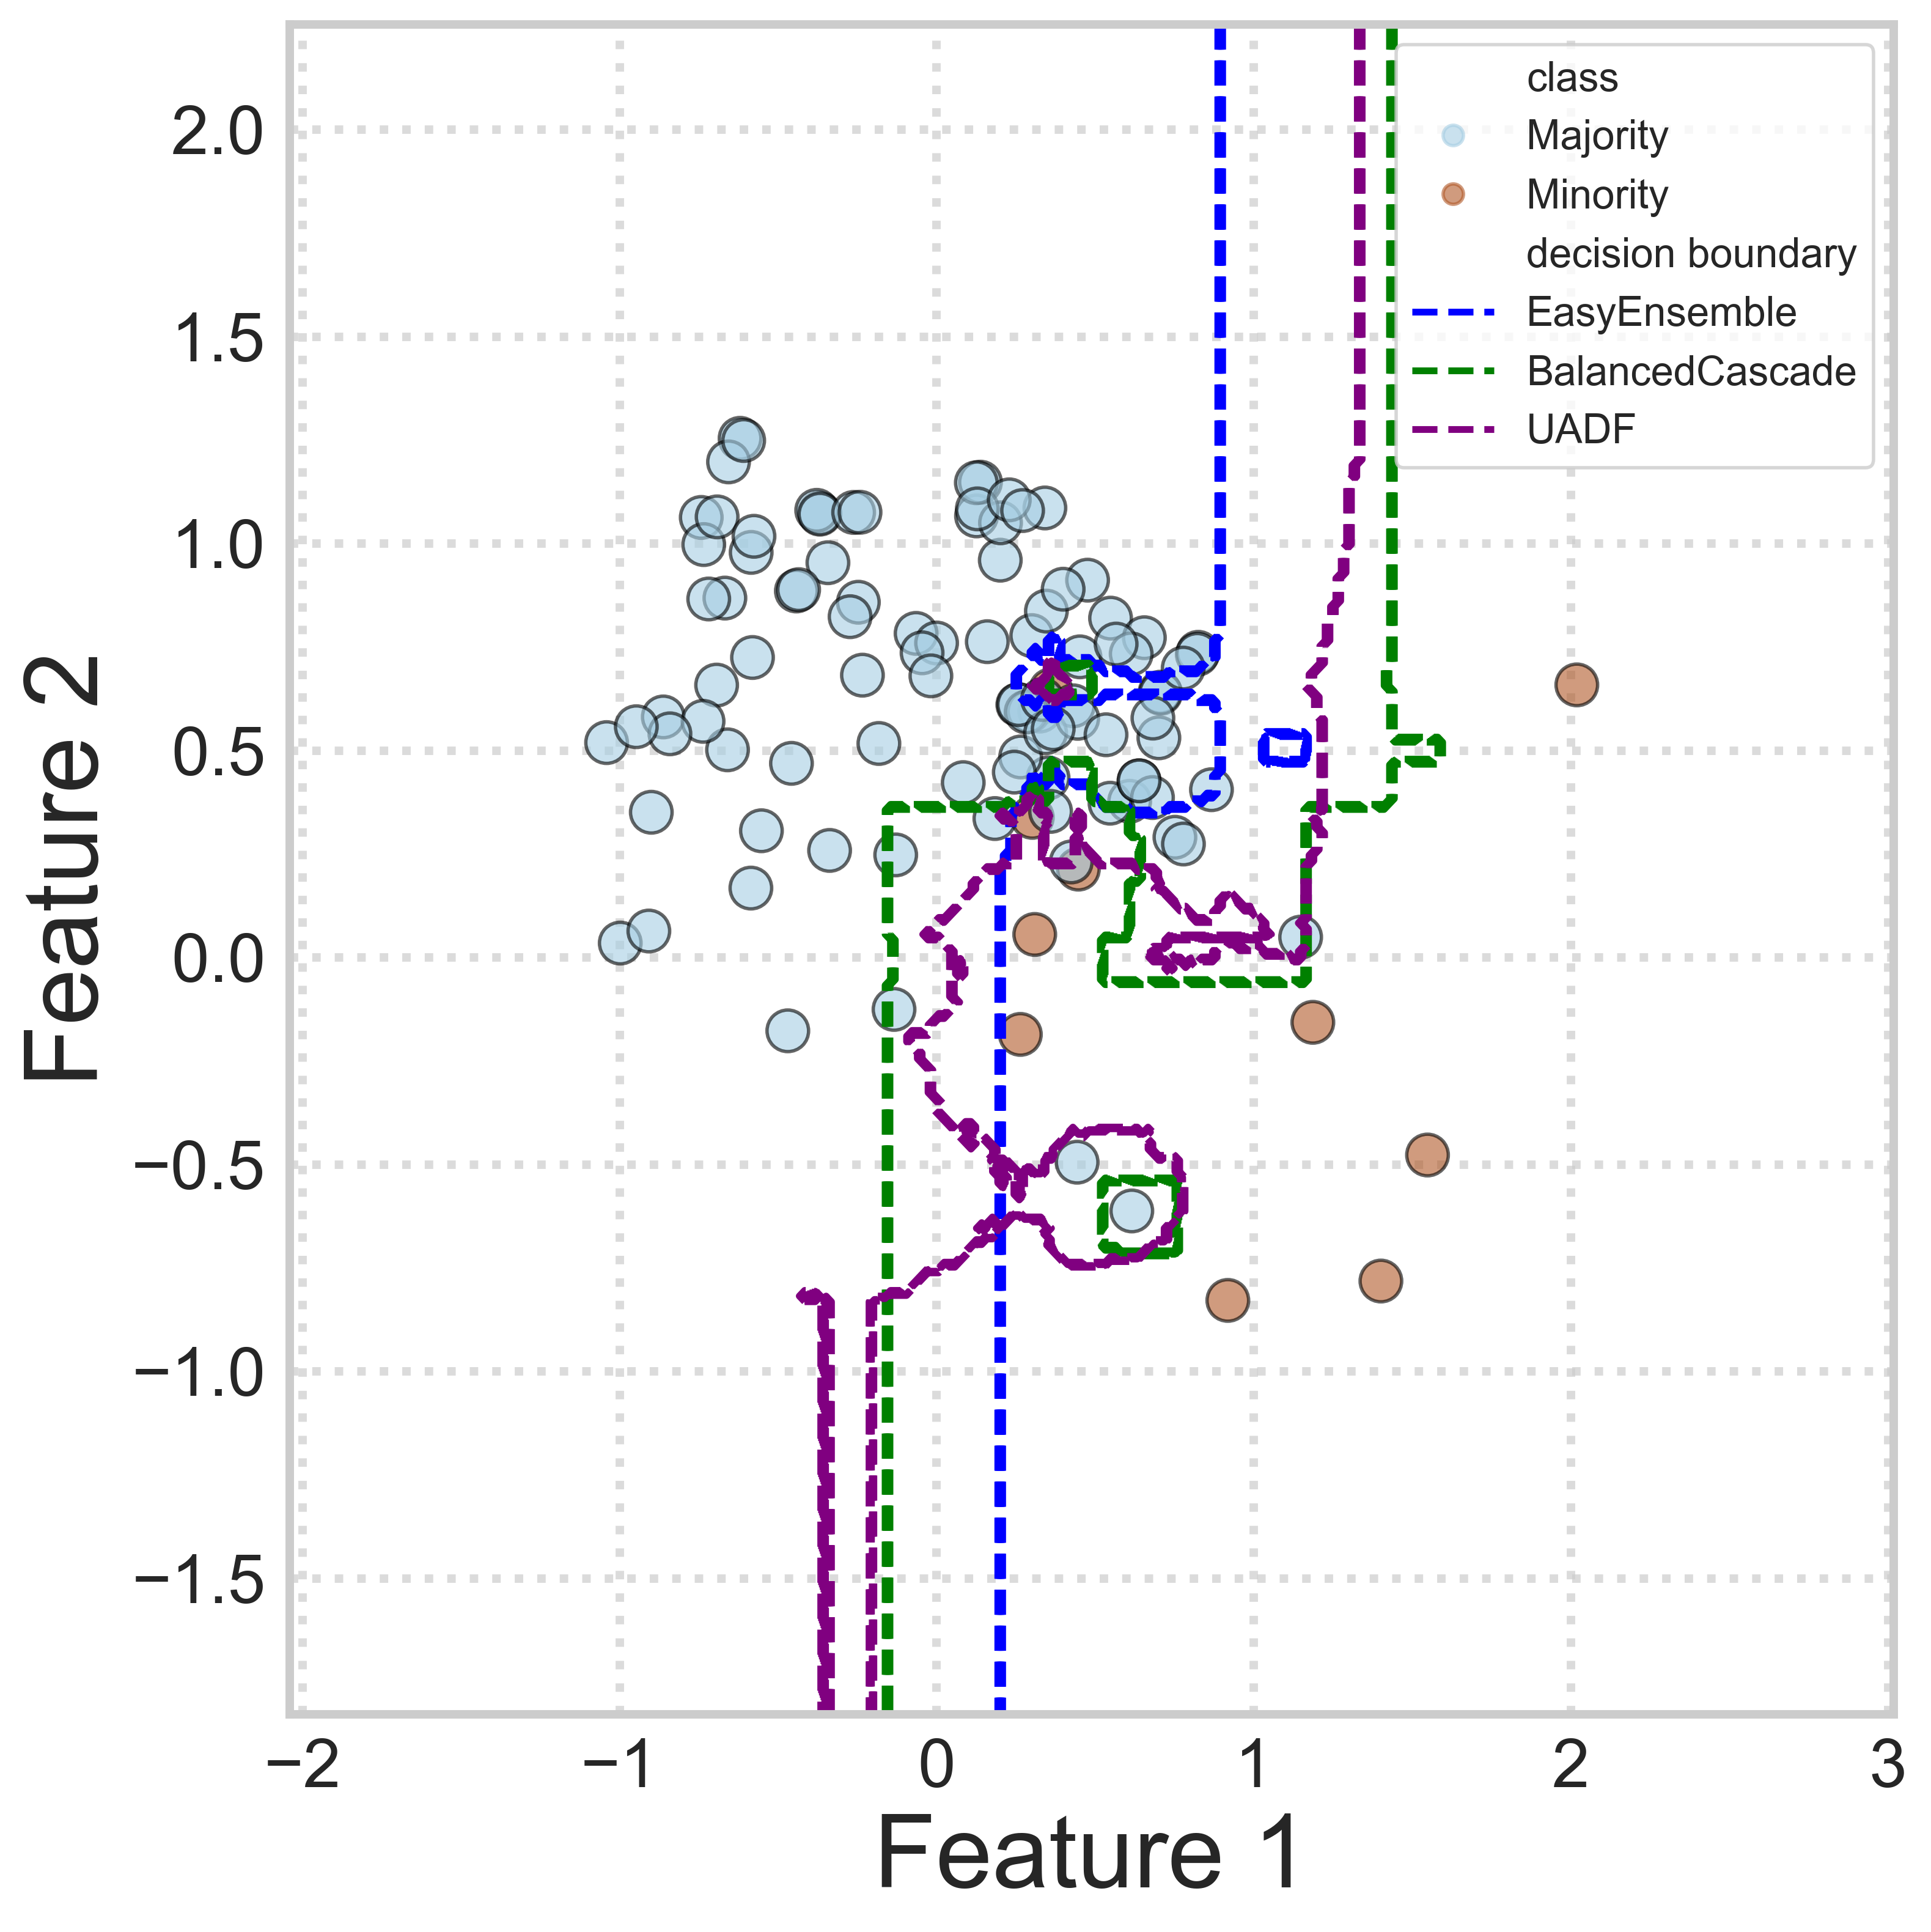

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.ensemble import EasyEnsembleClassifier
from imbens.ensemble import BalanceCascadeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib  # 用于保存模型
import json  # 用于保存种子
from sklearn.datasets import make_moons
from collections import Counter
from matplotlib.lines import Line2D
from UADF import UncertaintyAwareDeepForest
from demo import get_config


def interpolate_safe_majority_class(X, y, classifier, threshold=0.5, num_samples_to_generate=20, seed=42):
    """
    对安全的多数类样本进行插值生成新样本，并保存插值的种子
    X: 数据特征
    y: 类别标签
    classifier: 已训练的分类器
    threshold: 确定“安全样本”的预测概率阈值
    num_samples_to_generate: 需要插值生成的样本数
    seed: 随机种子
    """
    # 设置随机种子，以确保可重复性
    # np.random.seed(seed)
    
    # 计算每个样本的预测概率
    proba = classifier.predict_proba(X)
    
    # 选择安全样本：对于多数类（类别0），其属于类别0的概率大于阈值
    majority_class_samples = X[y == 0]
    majority_class_probs = proba[y == 0, 0]  # 获取多数类样本属于类别0的概率
    majority_class_probs = np.array(majority_class_probs)
    
    print(majority_class_probs)
    print(np.where(majority_class_probs > threshold))
    # 选择概率大于阈值的安全样本
    safe_samples_idx = np.where(majority_class_probs > threshold)[0]
    print(safe_samples_idx)
    safe_samples = majority_class_samples[safe_samples_idx]

    # 用于存储插值生成的新样本
    new_samples = []
    
    # 插值过程：在安全样本之间进行插值
    for _ in range(num_samples_to_generate):
        # 随机选择两个安全多数类样本
        idx1, idx2 = np.random.choice(len(safe_samples), 2, replace=False)
        sample1, sample2 = safe_samples[idx1], safe_samples[idx2]
        
        # 在这两个样本之间进行线性插值
        new_sample = sample1 + np.random.rand() * (sample2 - sample1)
        
        # 将插值生成的新样本添加到列表中
        new_samples.append(new_sample)
    
    # 将生成的新样本添加到原数据中
    new_samples = np.array(new_samples)
    X_new = np.vstack([X, new_samples])
    y_new = np.hstack([y, np.zeros(num_samples_to_generate)])  # 新样本的标签为0（多数类）
    
    # 保存随机种子到文件
    with open("interpolation_seed.json", "w") as f:
        json.dump({"seed": seed}, f)
    
    return X_new, y_new

if __name__ == "__main__":
    # Set constants for plot styling
    text_size = 30  # Adjust text size slightly to fit layout
    linewidth = 2  # Line width for plot styling

    # 生成均衡数据集
    X, y = make_moons(n_samples=40, noise=0.3, random_state=36)

    # 对类别 1 进行下采样
    minority_class_samples = X[y == 1]
    majority_class_samples = X[y == 0]

    # 保留所有的多数类样本，减少少数类样本至 50 个
    minority_class_samples = minority_class_samples[:10]

    # 合并数据，生成不均衡数据集
    X = np.vstack([majority_class_samples, minority_class_samples])
    y = np.hstack([np.zeros(len(majority_class_samples)), np.ones(len(minority_class_samples))])

    # 训练EasyEnsemble分类器
    rf = EasyEnsembleClassifier(n_estimators=20)
    rf.fit(X, y)

    # 对安全多数类样本进行插值
    X_resampled, y_resampled = interpolate_safe_majority_class(X, y, rf, threshold=0, num_samples_to_generate=80, seed=5)

    # 读取保存的 resampled 数据
    # X_resampled = np.load("X_resampled.npy")
    # y_resampled = np.load("y_resampled.npy")

    print(Counter(y_resampled))
    
    rf = EasyEnsembleClassifier(n_estimators=50)
    rf.fit(X_resampled, y_resampled)
    
    # 训练BalancedCascade分类器
    bc = BalanceCascadeClassifier(n_estimators=50)
    bc.fit(X, y)
    
    

    # 创建网格用于绘制决策边界
    x_min, x_max = X_resampled[:, 0].min() - 1, X_resampled[:, 0].max() + 1
    y_min, y_max = X_resampled[:, 1].min() - 1, X_resampled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # 使用EasyEnsemble模型预测网格点
    Z_easyensemble = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_easyensemble = Z_easyensemble.reshape(xx.shape)
    
    
    # 使用BalancedCascade模型预测网格点
    Z_balancedcascade = bc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_balancedcascade = Z_balancedcascade.reshape(xx.shape)
    
    # 创建子图并设置大小
    fig, ax = plt.subplots(figsize=(8,8), dpi=400)

    # 绘制EasyEnsemble决策边界（只绘制虚线边界）
    ax.contour(xx, yy, Z_easyensemble, colors='blue', linewidths=2, linestyles='dashed')
    ax.contour(xx, yy, Z_balancedcascade, colors='green', linewidths=2, linestyles='dashed')
    plt.show()
    
    uadf = UncertaintyAwareDeepForest(config=get_config())
    uadf.fit(X_resampled, y_resampled)
    # 使用UADF模型预测网格点
    Z_uadf = uadf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_uadf = Z_uadf.reshape(xx.shape)

    # 创建子图并设置大小
    fig, ax = plt.subplots(figsize=(8,8), dpi=400)

    # 绘制EasyEnsemble决策边界（只绘制虚线边界）
    ax.contour(xx, yy, Z_easyensemble, colors='blue', linewidths=2, linestyles='dashed')  # EasyEnsemble: 虚线边界
    
    # 绘制BalancedCascade决策边界（只绘制虚线边界）
    ax.contour(xx, yy, Z_balancedcascade, colors='green', linewidths=2, linestyles='dashed')  # BalancedCascade: 虚线边界

    ax.contour(xx, yy, Z_uadf, colors='purple', linewidths=2, linestyles='dashed')
    
    
    
    # 绘制样本点
    scatter = ax.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=plt.cm.Paired, s=150, edgecolor='black', alpha=0.6)

    # 手动设置legend
    handles, labels = scatter.legend_elements()
    labels = ['Majority', 'Minority']  # 修改legend标签

    # Create custom legend for decision boundaries
    boundary_legend = [Line2D([0], [0], color='blue', lw=2, label='EasyEnsemble', linestyle='dashed'),
                       Line2D([0], [0], color='green', lw=2, label='BalancedCascade', linestyle='dashed'),
                       Line2D([0], [0], color='purple', lw=2, label='UADF', linestyle='dashed')]
    
    class_patch = Line2D([0], [0], color='white', lw=0, label='Class')
    # Combine both legends
    ax.legend([class_patch] + handles + [class_patch] + boundary_legend, ['class'] + labels + ['decision boundary'] + ['EasyEnsemble', 'BalancedCascade', 'UADF'], fontsize=12, loc='upper right')

    ax.set_xlabel("Feature 1", fontsize=text_size)
    ax.set_ylabel("Feature 2", fontsize=text_size)
    ax.grid(True, linestyle="dotted", alpha=0.7, linewidth=2.5)

    # 加粗边框
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    # 调整x轴和y轴刻度标签的字体大小
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=12)

    # 调整布局并保存图像
    plt.tight_layout()
    plt.savefig("fig/decision_boundaries_both_models_with_legend.jpg")
    plt.show()


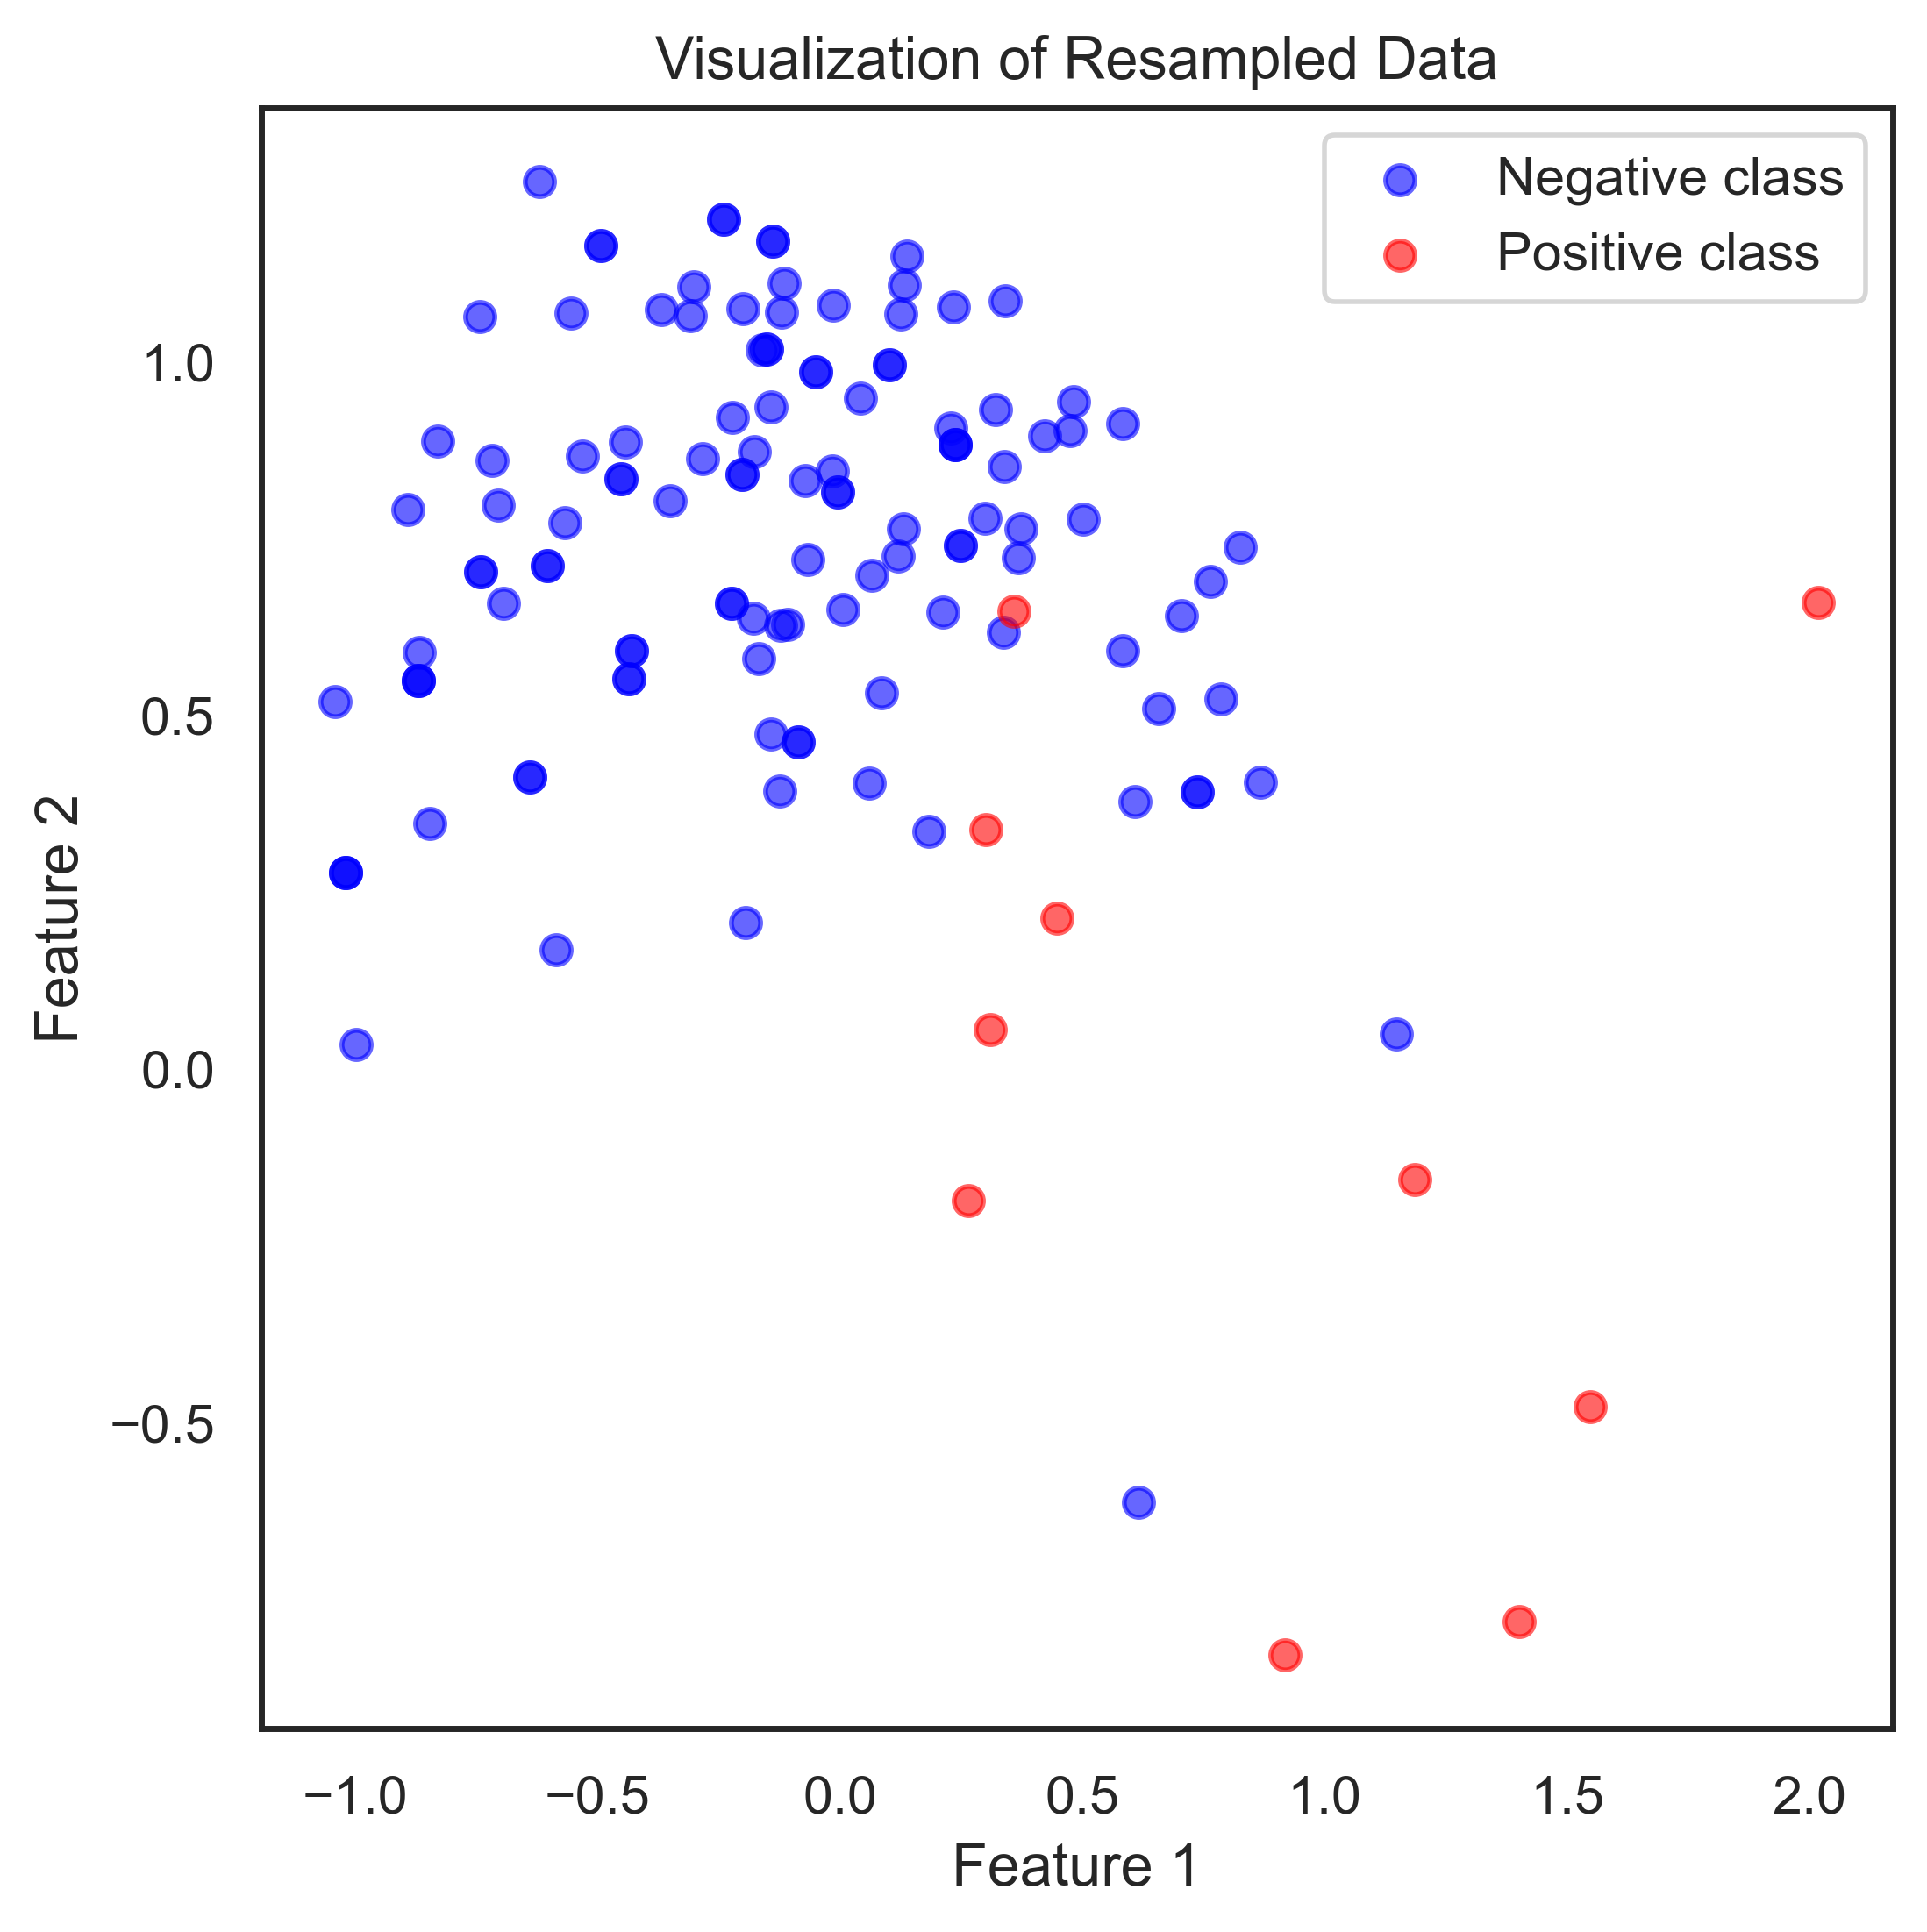

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Load the resampled data (ensure the files are available in your environment)
X_resampled = np.load("X_resampled.npy")
y_resampled = np.load("y_resampled.npy")

# Assuming that the dataset is 2D for visualization (you may need to adjust if it's higher-dimensional)
plt.figure(figsize=(6, 6), dpi=400)

# Plot the positive and negative samples
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], color='blue', label='Negative class', alpha=0.6)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], color='red', label='Positive class', alpha=0.6)

# Add labels and title
plt.title("Visualization of Resampled Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show the plot
plt.show()


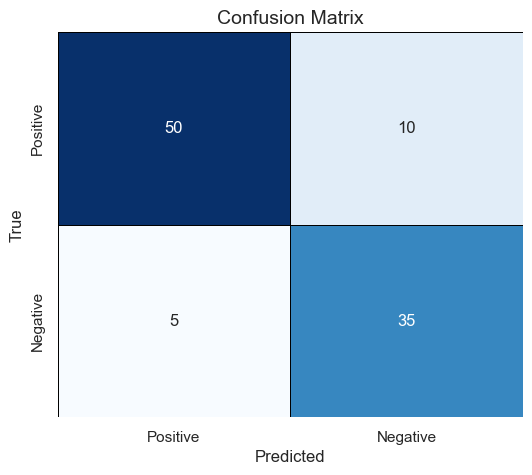

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 示例混淆矩阵
confusion_matrix = np.array([[50, 10],  # [TP, FN]
                             [5,  35]]) # [FP, TN]

# 设置绘图风格
sns.set(style='white', palette='muted')

# 创建一个绘图
plt.figure(figsize=(6, 5))

# 创建热力图
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['Positive', 'Negative'], 
                 yticklabels=['Positive', 'Negative'], 
                 cbar=False, linewidths=0.5, linecolor='black')

# 添加标题和标签
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# 显示图像
plt.show()


In [2]:
import inspect
import data_util  # 将 'filename' 替换为实际的 Python 脚本名称

# 获取该模块中的所有函数
functions = [name for name, obj in inspect.getmembers(data_util) if inspect.isfunction(obj) and name.startswith('get')]

print(functions)


['get_WDBC', 'get_car1', 'get_car2', 'get_car3', 'get_ecoli1', 'get_ecoli2', 'get_glass1', 'get_glass2', 'get_glass3', 'get_glass4', 'get_glass5', 'get_haberman', 'get_hepatitis', 'get_liver_disorders1', 'get_liver_disorders2', 'get_liver_disorders3', 'get_liver_disorders4', 'get_page_blocks1', 'get_page_blocks2', 'get_page_blocks3', 'get_page_blocks4', 'get_poker_hand', 'get_statlog_vehicle_silhouettes1', 'get_statlog_vehicle_silhouettes2', 'get_statlog_vehicle_silhouettes3', 'get_statlog_vehicle_silhouettes4', 'get_waveform1', 'get_waveform2', 'get_waveform3', 'get_wine1', 'get_wine2', 'get_yeast1', 'get_yeast2', 'get_yeast3', 'get_yeast4', 'get_yeast5']
